# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#code body provided by module challenge starter code.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#code body provided by module challenge starter code.
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#creating a sample list for testing, to avoid running into openweather's api free query limit.
#cities_test = cities[0:10]

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#code body provided by module challenge starter code.
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, using endpoint 'q=' to pass in city name. API documentation at source (1)
    #city_url = f"{base_url}?q={city}&appid={weather_api_key}"

    #setting API call parameters in dictionary, to later pass into requests.get() (2)
    params={"q":city, "appid":weather_api_key, "units":'metric'}

    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url,params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] #leaving data in unix timestamp format

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
san jose village not found. Skipping...
vingt cinq not found. Skipping...
hayma' not found. Skipping...
dadonghai not found. Skipping...
yirol not found. Skipping...
ouellah not found. Skipping...
fuvahmulah not found. Skipping...
taiohae not found. Skipping...
puerto san carlos not found. Skipping...
toga village not found. Skipping...
ahau not found. Skipping...
kataragama not found. Skipping...
yangor not found. Skipping...
cargados carajos not found. Skipping...
cumaribo not found. Skipping...
saksaul'skiy not found. Skipping...
tanrake village not found. Skipping...
isle of lewis not found. Skipping...
takamaka not found. Skipping...
hihifo not found. Skipping...
'ohonua not found. Skipping...
lokken not found. Skipping...
gallivare not found. Skipping...
tranovaho not found. Skipping...
ladismith not found. Skipping...
torteval not found. Skipping...
asau village not found. Skipping...
-----------------------------
Data 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.48,89,98,8.30,TF,1730173595
1,grytviken,-54.2811,-36.5092,-0.31,96,100,2.37,GS,1730173597
2,yellowknife,62.4560,-114.3525,-3.71,86,100,5.14,CA,1730173598
3,puerto natales,-51.7236,-72.4875,8.42,82,82,5.39,CL,1730173599
4,waitangi,-43.9535,-176.5597,14.90,83,28,1.79,NZ,1730173600


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.48,89,98,8.30,TF,1730173595
1,grytviken,-54.2811,-36.5092,-0.31,96,100,2.37,GS,1730173597
2,yellowknife,62.4560,-114.3525,-3.71,86,100,5.14,CA,1730173598
3,puerto natales,-51.7236,-72.4875,8.42,82,82,5.39,CL,1730173599
4,waitangi,-43.9535,-176.5597,14.90,83,28,1.79,NZ,1730173600


## Create the Scatter Plots Requested

### Latitude Vs. Temperature

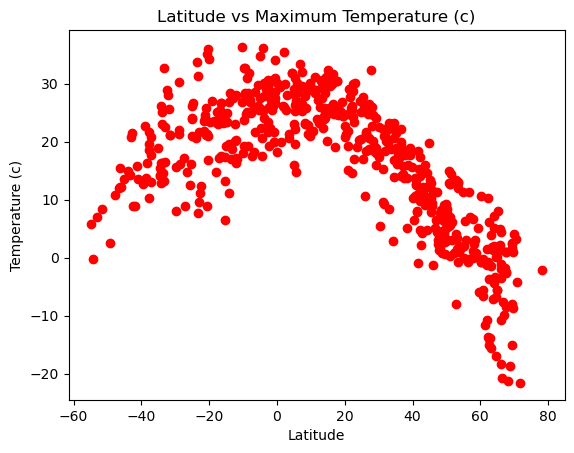

In [18]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Maximum Temperature (c)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (c)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

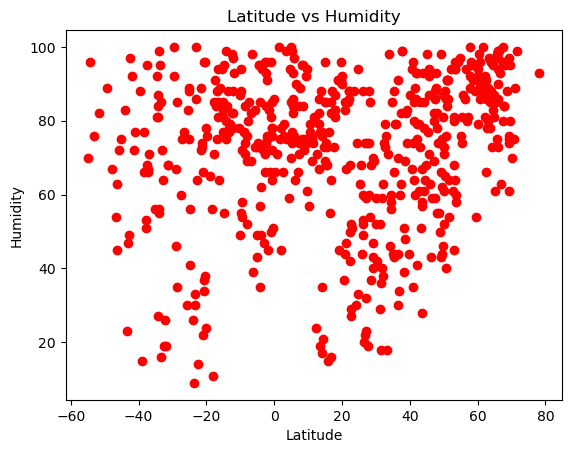

In [19]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

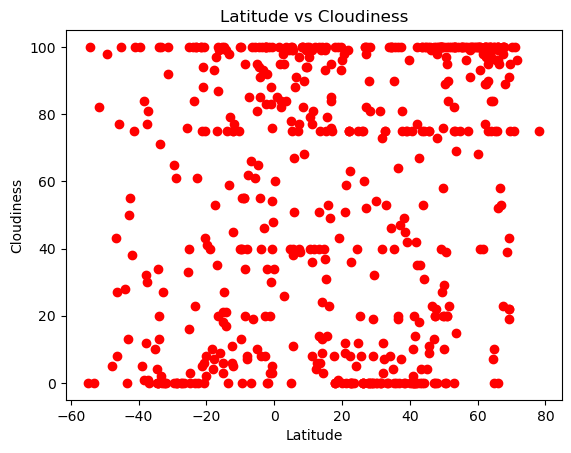

In [20]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

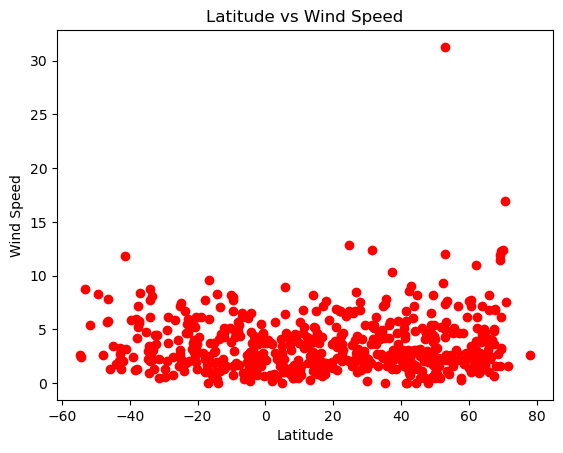

In [21]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

def set_regression(x,y):
    #generating values using scipy.stats.linregress() (3)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    #creating regression formula in string format (3)
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

    return line_eq, slope, intercept, rvalue, pvalue, stderr
    

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) (4)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,-3.71,86,100,5.14,CA,1730173598
7,katsuren-haebaru,26.3369,127.8719,26.21,88,75,6.69,JP,1730173606
8,wailua homesteads,22.0669,-159.3780,25.44,88,75,6.69,US,1730173607
9,st. john's,47.5649,-52.7093,3.09,86,20,4.63,CA,1730173608
14,thompson,55.7435,-97.8558,3.09,87,100,5.14,CA,1730173615


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0) (4)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.48,89,98,8.30,TF,1730173595
1,grytviken,-54.2811,-36.5092,-0.31,96,100,2.37,GS,1730173597
3,puerto natales,-51.7236,-72.4875,8.42,82,82,5.39,CL,1730173599
4,waitangi,-43.9535,-176.5597,14.90,83,28,1.79,NZ,1730173600
5,east ballina,-28.8667,153.5833,21.99,67,61,4.89,AU,1730173601


##  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7901154350282624


Text(0, 0.5, 'Max Temp (c)')

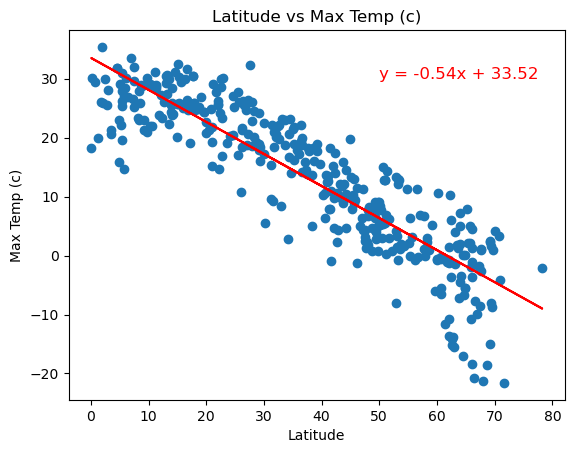

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.title("Latitude vs Max Temp (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")


The r^2 value is: 0.36522527944619243


Text(0, 0.5, 'Max Temp (c)')

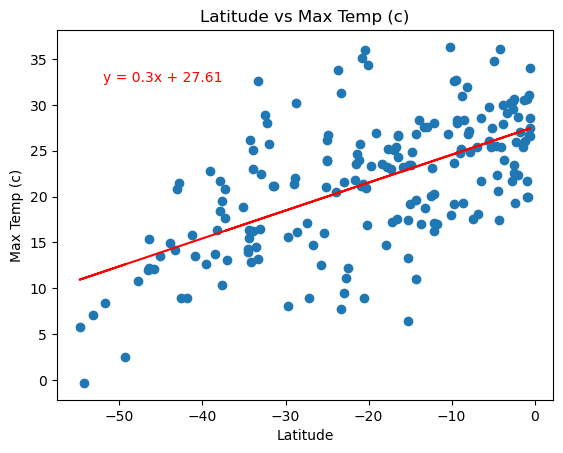

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(-52,32.5),fontsize=10,color="red")
plt.title("Latitude vs Max Temp (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")

**Discussion about the linear relationship:** In the southern hemisphere, there maximum temperature (c) tends to increase as the latitude increases towards the equator. Conversely, the data shows that maximum temperature tends to decrease as latitude increases (moving from the equator to the south pole. It appears, based on the calculated r^2 values for both the north (r^2 = 0.7901154350282624) and the south (r^2 = 0.36522527944619243), that there is a stronger linear relationship between latitude and temperature in the northern hemisphere than the southern hemisphere. Visually, this is displayed in the plots, as the datapoints in the northern hemisphere sample cluster closely with the trendline, whereas there is more spread in the sample for the souterhn hemisphere. 

## Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.05887597409337115


Text(0, 0.5, 'Humidity')

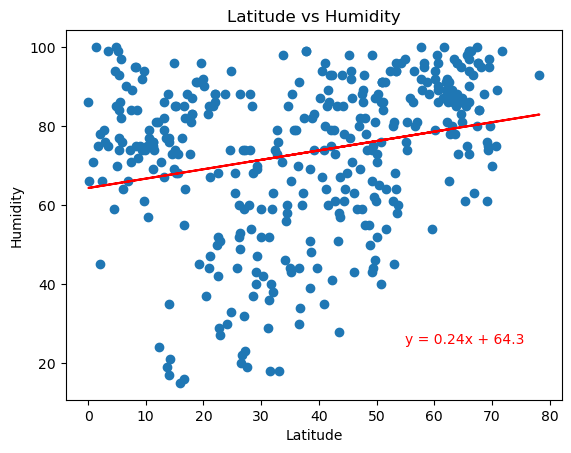

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(55,25),fontsize=10,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r^2 value is: 0.02060551288450242


Text(0, 0.5, 'Humidity')

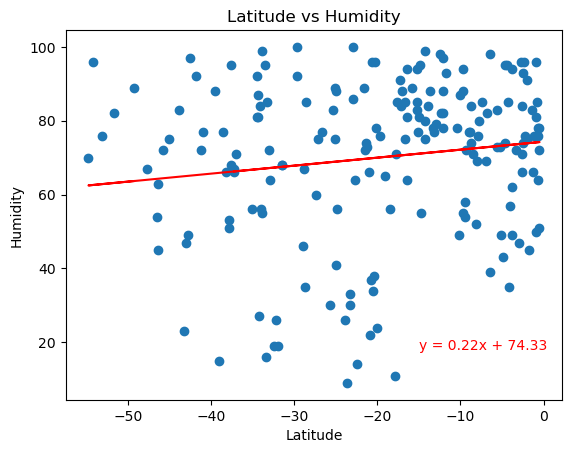

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(-15,18),fontsize=10,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** In the northern hemisphere, the data appears to show an increasing trend (i.e. humidity increases as latitude increases north of the equator). In the southern hemisphere, humidity appears to increase as latitude approaches zero. However, in both the northern and southern hemispheres, there is an extrememly weak linear relationship between latitude as the independent variable and humidity as the dependent variable.

## Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.028160502496030835


Text(0, 0.5, 'Cloudiness')

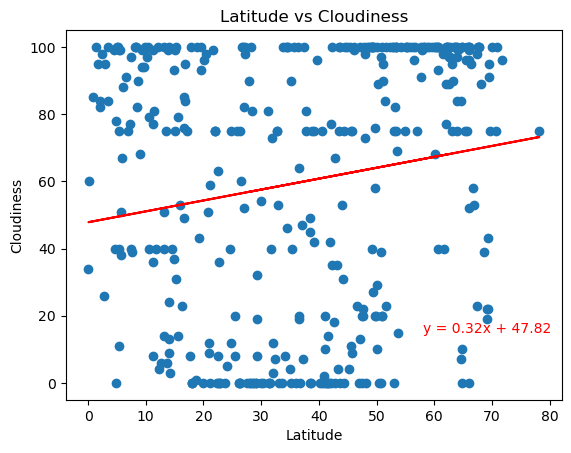

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(58,15),fontsize=10,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r^2 value is: 0.03148818291499386


Text(0, 0.5, 'Cloudiness')

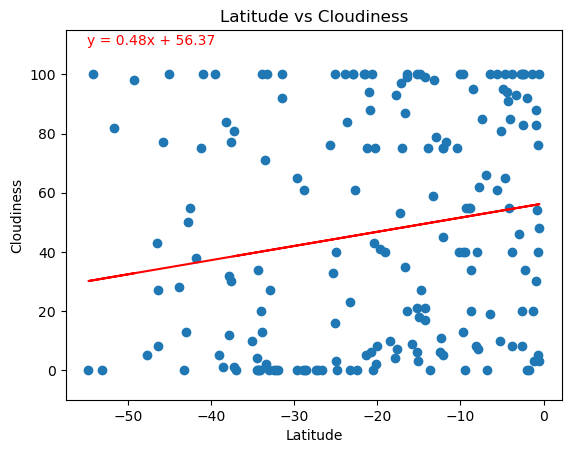

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#increasing the ylim to make space for annotation
plt.ylim(-10,115)
#adding regression formula string to plot (3)
plt.annotate(line_eq,(-55,110),fontsize=10,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** In the southern hemisphere, cloudiness tends to increase as latitude approaches zero (i.e moving north towards the equator). In the northern hemisphere, the data appears to show that cloudiness tends to increase as latitude increases north of the equator. That said, in both the northern and southern hemispheres, the r^2 value is very low, suggesting that there is an very weak linear relationship between latitude and humidity.

## Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.020892267118533616


Text(0, 0.5, 'Wind Speed (m/s)')

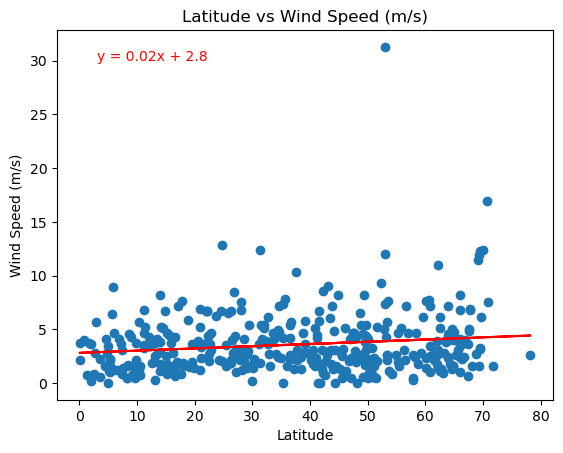

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(3,30),fontsize=10,color="red")
plt.title("Latitude vs Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

The r^2 value is: 0.03656708141032917


Text(0, 0.5, 'Wind Speed (m/s)')

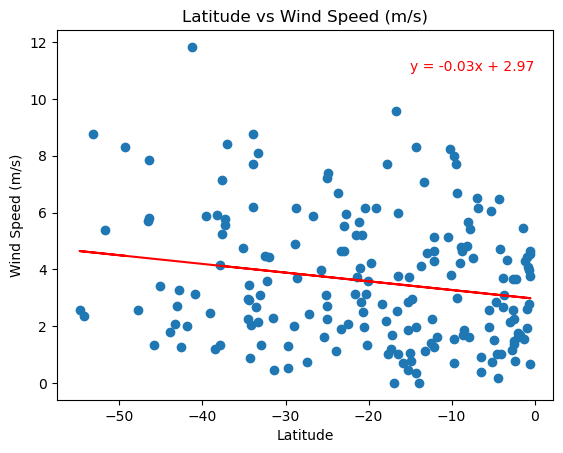

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(-15,11),fontsize=10,color="red")
plt.title("Latitude vs Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** It appears that there is very little change in wind speed as latitude changes, in either the southern or northern hemispheres. In both cases, the slope in bothe cases is minimal (to the hundreth decimal point). Additionally, small r^2 values for both the sourthern and northern datasets suggests a weak linear relationship between latitude and windspeed in both samples.